# Desafío Analítico Business Process Analytics

En el área deseamos comprender de qué forma nuestros equipos operan en el proceso de gestión de incidencias de clientes con tal de ofrecer un servicio de excelencia.

Tras conversaciones con distintos socios de negocio, se han levantado las siguientes hipótesis:

* “…En realidad los equipos están sometidos a intensas cargas de trabajo, lo que limita nuestra capacidad de gestión…
* “…La gestión de una incidencia end-to-end nos toma aproximadamente 2 días en ser resuelta…”
* “…Nuestro proceso de gestión es realmente eficiente, no existen dispersiones importantes en las actividades que realizamos, salvo que sea una variante demasiado compleja de tratar...”
* “…Hemos recibido distintos reclamos por nuestra gestión, pero la verdad no comprendemos en que estamos fallando…”

Afortunadamente, formas parte de nuestro equipo de analistas y nos encantaría que asumas el desafío de ver la forma en que podemos apoyar al equipo de gestión de incidencias del banco para dar lo mejor de sí. Lo ideal es que puedas validar las hipótesis que nuestros colegas han levantado con el debido fundamento analítico de datos orientado a la toma de decisiones. Buscamos comprender que conclusiones importantes se desprenden de este proceso de gestión y los análisis que puedas realizar, y, finalmente, que recomendaciones le harías a esta área para mejorar el performance de su trabajo.

Este desafío tiene el objetivo de evaluar tus habilidades de manejo de datos, análisis, pensamiento crítico, visualización y storytelling. Siéntase en total libertad de ocupar cualquier herramienta que considere adecuada para el desafío.

Entregables
Esperamos que tu respuesta vuelva en un documento PDF que incluya:

1. Un análisis y juicio sobre las hipótesis levantadas por nuestro equipo.
2. Una sección donde comentes las principales dificultades que enfrentaste en el análisis.
3. Que mejoras a futuro podrías realizar para mejorar tu respuesta.
4. Una copia de los códigos/herramientas que hayas empleado para tu análisis

## Solución

Mi estrategia para resolver el desafio sera la siguiente:

1. Realizare un analisis exploratorio con el fin de comprender la base de datos, el tipo de datos, que tipo de limpieza y re-estructuracion tendre que aplicar para cumplir con los requerimientos del desafio.
    Para lo anterior utilizaré la biblioteca Pandas para trabajar con los datos y visualizarlos, y las bibliotecas Matplotlib y Seaborn para crear gráficos que me ayuden a comprender mejor la información. 
2. Para evaluar la carga de trabajo de los equipos, analizaré el número de incidentes asignados a cada grupo de asignación y los visualizaré en un gráfico de barras. Esto me permitirá ver cuántos incidentes maneja cada equipo y si hay algún equipo con una carga de trabajo especialmente alta.
3. Para calcular la duración promedio de gestión end-to-end de una incidencia, usaré el código que proporcioné anteriormente para calcular la duración de cada incidente. Luego, calcularé la duración promedio de todos los incidentes.
4. Para analizar la eficiencia del proceso de gestión y las dispersiones en las actividades, calcularé la desviación estándar de la duración de cada tipo de actividad. Una desviación estándar baja indica una menor dispersión, lo que sugiere un proceso más eficiente y consistente.
5. Para identificar áreas de mejora en la gestión de incidentes, analizaré las actividades con una duración promedio más alta y una mayor desviación estándar. Estas actividades podrían ser las que causan demoras y reclamos de los usuarios. Además, analizaré la distribución de las duraciones de las actividades para identificar posibles outliers que podrían ser incidentes especialmente difíciles de gestionar.
6. Siguiendo estos puntos, podré obtener una mejor comprensión de la carga de trabajo, la eficiencia y las áreas de mejora en la gestión de incidentes, lo que me permitirá abordar mejor las inquietudes y preguntas planteadas por mi equipo.


### 0.- Librerias y DataFrame

In [1]:
# Cargar de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display
from pm4py.objects.conversion.log import converter as log_converter
from scipy.stats import iqr

In [2]:
# Leer y cargar la base de datos en un DataFrame de Pandas:
url = "https://data.4tu.nl/file/657fb1d6-b4c2-4adc-ba48-ed25bf313025/bd6cfa31-44f8-4542-9bad-f1f70c894728"
data = pd.read_csv(url, delimiter=';')
data = data.dropna()
data = data.drop_duplicates()

### 1.- Análisis Exploratorio

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466737 entries, 0 to 466736
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Incident ID              466737 non-null  object
 1   DateStamp                466737 non-null  object
 2   IncidentActivity_Number  466737 non-null  object
 3   IncidentActivity_Type    466737 non-null  object
 4   Assignment Group         466737 non-null  object
 5   KM number                466737 non-null  object
 6   Interaction ID           466737 non-null  object
dtypes: object(7)
memory usage: 28.5+ MB
None
       Incident ID            DateStamp IncidentActivity_Number  \
count       466737               466737                  466737   
unique       46616               273401                  466737   
top      IM0000428  28-02-2014 10:05:04             001A3689763   
freq           178                   11                       1   

       IncidentActivit

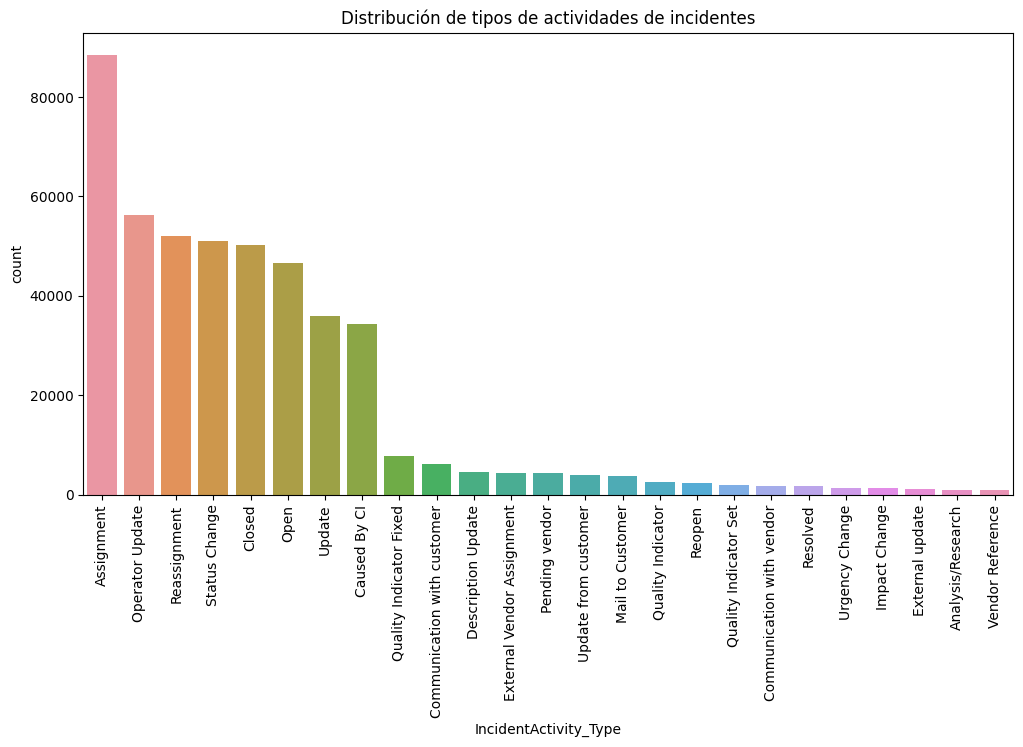

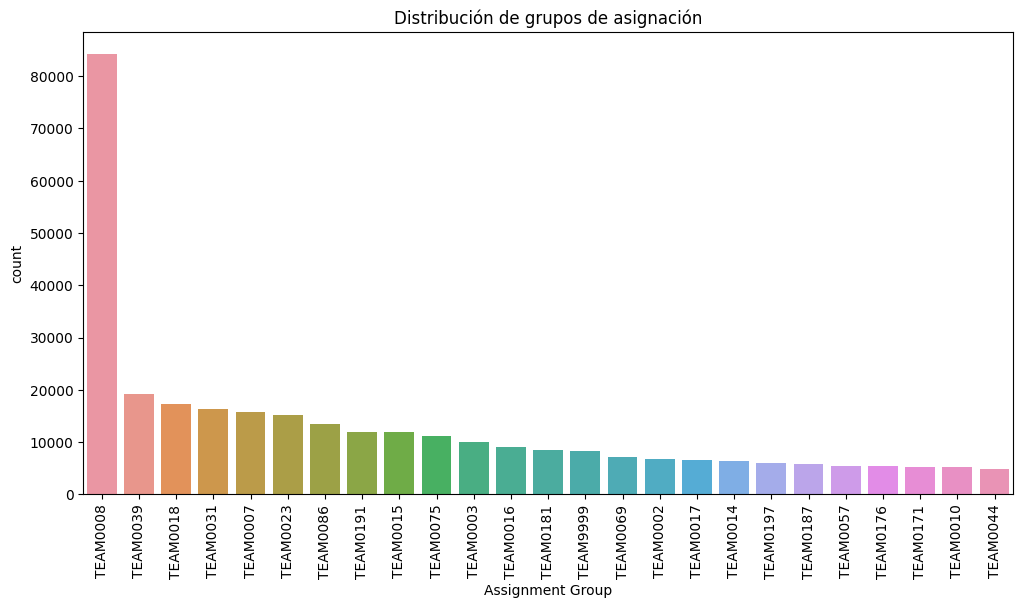

In [3]:
# Inspeccionar la información general del DataFrame, como el número de registros, columnas y los tipos de datos:
print(data.info())

# Obtener estadísticas descriptivas de las columnas numéricas y categóricas:
print(data.describe(include='all'))

# Verificar si hay datos faltantes:
print(data.isnull().sum())

#Explorar la distribución de las actividades de incidentes y los grupos de asignación utilizando gráficos de barras:
def plot_top_categories(data, column, top_n, title):
    plt.figure(figsize=(12, 6))
    top_categories = data[column].value_counts().head(top_n).index
    filtered_data = data[data[column].isin(top_categories)]
    sns.countplot(data=filtered_data, x=column, order=top_categories)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

# Parametrizar la cantidad de categorias a mostrar
top_n = 25  

# Distribución de tipos de actividades de incidentes
plot_top_categories(data, 'IncidentActivity_Type', top_n, 'Distribución de tipos de actividades de incidentes')

# Distribución de grupos de asignación
plot_top_categories(data, 'Assignment Group', top_n, 'Distribución de grupos de asignación')

### Resultados

1. La base de datos tiene 466,737 registros y 7 columnas.
2. Todas las columnas tienen tipo de dato 'object'.
3. No hay valores nulos en ninguna de las columnas.

**Algunas estadísticas descriptivas interesantes:**

* Hay 46,616 incidentes únicos ('Incident ID') en la base de datos, siendo el incidente 'IM0000428' el que tiene la mayor cantidad de registros (178 veces).
* Hay 273,401 marcas de tiempo ('DateStamp') únicas en la base de datos. La marca de tiempo con mayor frecuencia es '28-02-2014 10:05:04', que aparece 11 veces.
* Todos los registros de la columna 'IncidentActivity_Number' son únicos.
* Existen 39 tipos de actividades de incidentes únicas ('IncidentActivity_Type'). El tipo de actividad más común es 'Assignment', que aparece en 88,502 registros.
* Hay 242 grupos de asignación ('Assignment Group') únicos. El grupo de asignación más común es 'TEAM0008', con 84,143 registros.
* Existen 1,825 números KM ('KM number') únicos en la base de datos. El número KM más frecuente es 'KM0001106', que aparece en 17,638 registros.
* Hay 46,444 ID de interacción ('Interaction ID') únicos en la base de datos. El ID de interacción más común es '#N/B', que aparece en 5,643 registros. Es posible que este valor represente casos en los que no se ha registrado una interacción específica.

**En resumen, la base de datos contiene una gran cantidad de información sobre incidentes, sus actividades relacionadas, marcas de tiempo, tipos de actividades, grupos de asignación, números KM e ID de interacción. Con esta información, es posible llevar a cabo un análisis exhaustivo de la gestión de incidentes y encontrar áreas de mejora en el proceso.**

### 2.- Cargas de trabajo

In [4]:
# Convertir la columna 'DateStamp' a tipo datetime
data['DateStamp'] = pd.to_datetime(data['DateStamp'])

# Calcular la duración de cada incidente en horas
data['Duration'] = data.groupby('Incident ID')['DateStamp'].transform(lambda x: (x.max() - x.min()).total_seconds() / 3600)

# Calcular Estadisticas
grouped_data = data.groupby('Assignment Group').agg(
    Unique_Incidents=('Incident ID', 'nunique'),
    Avg_Duration=('Duration', 'mean'),
    Median_Duration=('Duration', 'median'),
    Std_Duration=('Duration', 'std'),
    Q1_Duration=('Duration', lambda x: x.quantile(0.25)),
    Q3_Duration=('Duration', lambda x: x.quantile(0.75))
)

grouped_data['IQR_Duration'] = grouped_data['Q3_Duration'] - grouped_data['Q1_Duration']
grouped_data['CV_Duration'] = grouped_data['Std_Duration'] / grouped_data['Avg_Duration']

# Agregar columna con el cociente entre Unique_Incidents y Avg_Duration
grouped_data['Incidents_Duration_Ratio'] = grouped_data['Unique_Incidents'] / grouped_data['Avg_Duration']

# Reemplazar valores inf por 0
grouped_data['Incidents_Duration_Ratio'] = grouped_data['Incidents_Duration_Ratio'].apply(lambda x: 0 if x == np.inf else x)

# Ordenar y redondear resultados 
grouped_data = grouped_data.round(1)
grouped_data = grouped_data.sort_values(by='Incidents_Duration_Ratio', ascending=False)

# Agregar unidades a los nombres de las columnas
grouped_data.columns = [
    'Unique_Incidents',
    'Avg_Duration (hrs)',
    'Median_Duration (hrs)',
    'Std_Duration (hrs)',
    'Q1_Duration (hrs)',
    'Q3_Duration (hrs)',
    'IQR_Duration (hrs)',
    'CV_Duration',
    'Incidents_Duration_Ratio (incidents/hr)',
]

# Mostrar Resultados
display(grouped_data)

,Unique_Incidents,Avg_Duration (hrs),Median_Duration (hrs),Std_Duration (hrs),Q1_Duration (hrs),Q3_Duration (hrs),IQR_Duration (hrs),CV_Duration,Incidents_Duration_Ratio (incidents/hr)
Assignment Group,,,,,,,,,
TEAM0008,32404,1736.9,144.2,2565.4,3.7,2958.2,2954.5,1.5,18.7
TEAM0039,4381,725.8,2.6,1781.8,0.7,136.8,136.1,2.5,6.0
TEAM0031,3149,1196.3,6.2,2292.1,0.9,742.1,741.2,1.9,2.6
TEAM0191,2582,994.9,20.9,2011.0,1.2,734.0,732.8,2.0,2.6
TEAM0023,2991,1208.2,19.0,2311.2,1.1,743.9,742.7,1.9,2.5
...,...,...,...,...,...,...,...,...,...
TEAM0139,36,1204.6,50.6,2234.3,6.1,746.3,740.2,1.9,0.0
TEAM0140,4,2672.0,891.8,2388.4,891.8,4558.3,3666.5,0.9,0.0
TEAM0141,25,1959.3,331.4,3072.6,87.0,2280.7,2193.7,1.6,0.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_seaborn_metrics(data, top_n, title_prefix):
    def create_horizontal_bar_chart(column, xlabel):
        try:
            top_data = data.sort_values(by=column, ascending=False).head(top_n)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=column, y='Assignment Group', data=top_data, orient='h', palette='viridis')
            plt.title(f'{title_prefix} {column} per Assignment Group')
            plt.xlabel(xlabel)
        except ValueError:
            print(f"Could not plot {column} per Assignment Group")

    create_horizontal_bar_chart('Unique_Incidents', 'Unique Incidents')
    create_horizontal_bar_chart('Avg_Duration (hrs)', 'Average Duration (hrs)')
    create_horizontal_bar_chart('Median_Duration (hrs)', 'Median Duration (hrs)')
    create_horizontal_bar_chart('Incidents_Duration_Ratio (incidents/hr)', 'Incidents Duration Ratio (incidents/hr)')
    
    top_data = data.sort_values(by='Incidents_Duration_Ratio (incidents/hr)', ascending=False).head(top_n)
    
    if 'Assignment Group' in top_data.columns:
        plt.figure(figsize=(12, 6))
        sns.violinplot(x='Assignment Group', y='Incidents_Duration_Ratio (incidents/hr)', data=top_data, inner='quartile', orient='v')
        plt.xticks(rotation=90)
    else:
        print("Could not plot violin chart: 'Assignment Group' column not present in selected data.")

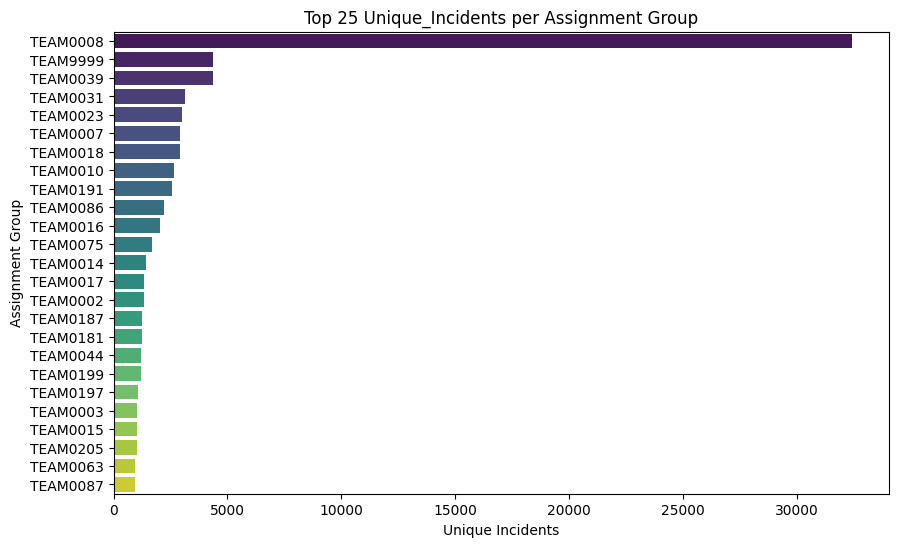

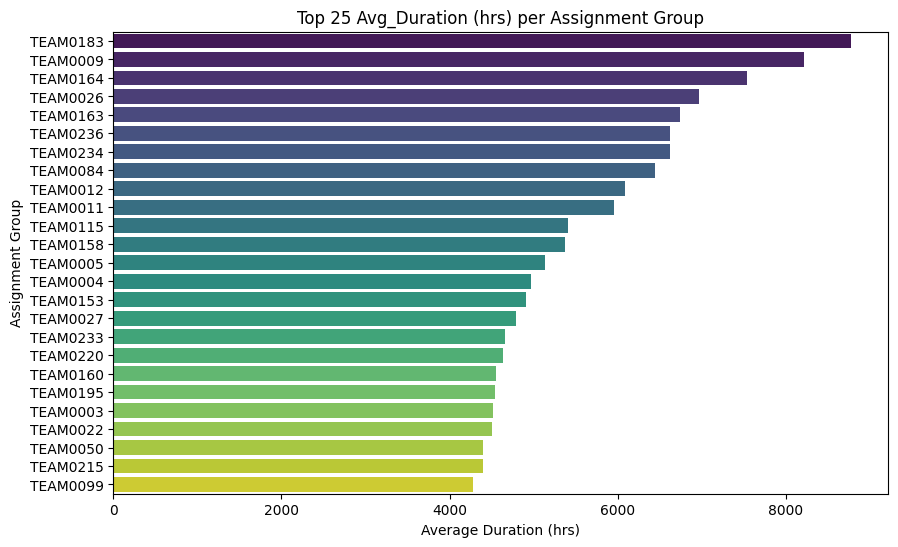

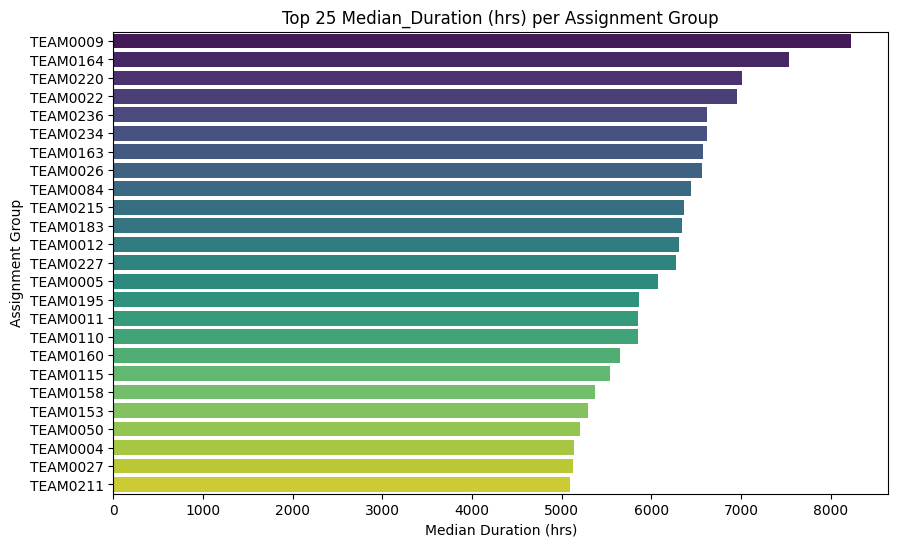

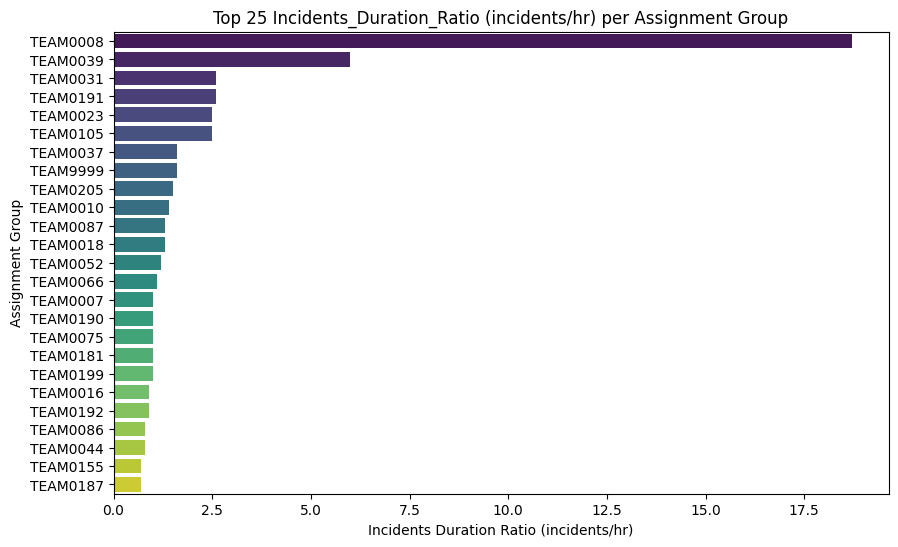

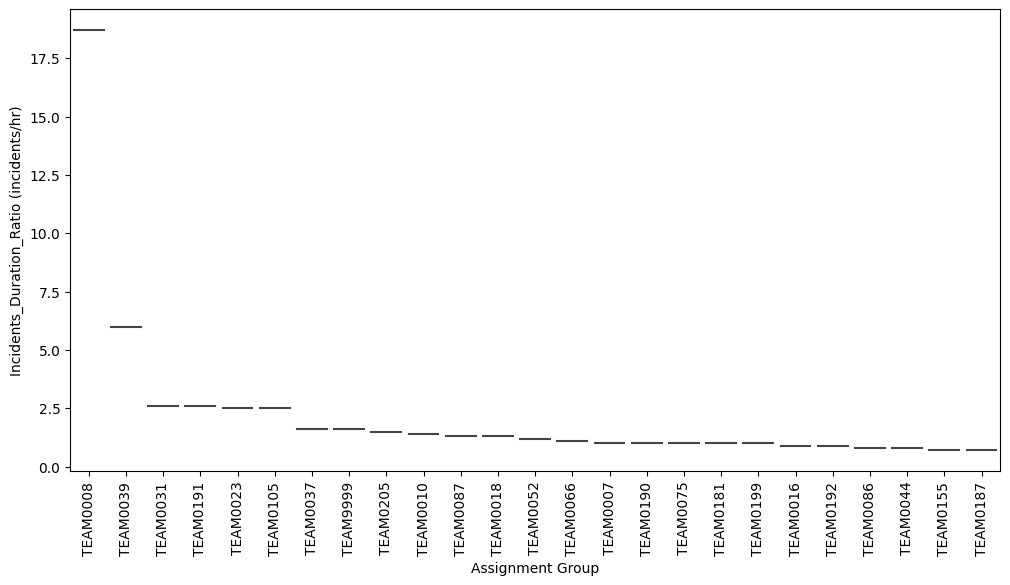

In [14]:
plot_seaborn_metrics(grouped_data.reset_index(), top_n=25, title_prefix='Top 25')

**Resultados:**

* Los grupos de asignación TEAM0008 y TEAM0039 tienen la mayor cantidad de incidentes únicos (32,404 y 4,381 respectivamente). Esto sugiere que estos equipos manejan un volumen más alto de incidentes en comparación con los demás.
* TEAM0008 tiene la mayor duración promedio (1,736.9 horas) y mediana (144.2 horas) de todos los equipos. Sin embargo, su coeficiente de variación (CV) es de 1.5, lo que indica que hay una variabilidad significativa en la duración de los incidentes. Esto puede deberse a la diversidad en la naturaleza y complejidad de los incidentes que maneja este equipo.
* TEAM0105 tiene la menor duración mediana de todos los equipos (0.1 horas). Esto indica que la mayoría de los incidentes que maneja este equipo se resuelven rápidamente. Sin embargo, su CV es de 5.2, lo que sugiere una alta variabilidad en la duración de los incidentes.
* Los equipos con la mayor variabilidad en la duración de los incidentes (CV> 4) son TEAM0105, TEAM0155 y TEAM0170. Esto puede indicar una amplia gama de tipos de incidentes, o posiblemente inconsistencias en la forma en que se manejan los incidentes dentro del equipo.
* TEAM0007 tiene la menor relación de duración de incidentes (incidents/hr) de 1.0, lo que indica que este equipo resuelve incidentes en un ritmo más lento en comparación con otros equipos. TEAM0008, por otro lado, tiene la mayor relación de duración de incidentes (18.7 incidents/hr), lo que indica que este equipo maneja y resuelve incidentes rápidamente a pesar de tener la mayor duración promedio y mediana.
* La mayoría de los equipos tienen una duración promedio significativamente mayor que su duración mediana. Esto sugiere que hay incidentes con duraciones extremadamente largas que afectan el promedio y que la distribución de la duración de los incidentes en estos equipos podría estar sesgada hacia la derecha (con una cola larga hacia valores más altos).

**Los equipos parecen variar en términos de volumen de incidentes y en la velocidad y consistencia con la que resuelven incidentes. Es importante considerar estos factores al evaluar el rendimiento del equipo y al asignar recursos para manejar los incidentes de manera eficiente. Además, los equipos con alta variabilidad en la duración de los incidentes podrían beneficiarse de una investigación más profunda para identificar posibles causas y oportunidades de mejora.**

### 3.- Analizar la eficiencia del proceso de gestión, tiempo promedio gestion end-to-end y las dispersiones en las actividades

In [15]:
def calculate_duration(group):
    first_timestamp = group['DateStamp'].min()
    last_timestamp = group['DateStamp'].max()
    duration = last_timestamp - first_timestamp
    return duration

# Calcular la duración de cada incidente y asignarla a un nuevo DataFrame
grouped_data = data.groupby('Incident ID').apply(calculate_duration).reset_index()
valid_incident_ids = grouped_data.dropna()['Incident ID']
valid_data = data[data['Incident ID'].isin(valid_incident_ids)].copy()

# Calcular la duración de cada actividad en cada incidente y asignarla a una nueva columna
valid_data['duration'] = valid_data.groupby('Incident ID')['DateStamp'].diff().shift(-1)
valid_data.dropna(subset=['duration'], inplace=True)
valid_data['duration_seconds'] = valid_data['duration'].dt.total_seconds()

# Filtrar incidentes que contienen 'Closed' y 'Open'
incident_ids_with_closed_and_open = valid_data[valid_data['IncidentActivity_Type'].isin(['Closed', 'Open'])].groupby('Incident ID')['IncidentActivity_Type'].nunique()
incident_ids_with_closed_and_open = incident_ids_with_closed_and_open[incident_ids_with_closed_and_open == 2].index

# Filtrar el DataFrame usando los incident_ids_with_closed_and_open
filtered_data = valid_data[valid_data['Incident ID'].isin(incident_ids_with_closed_and_open)].copy()

# Análisis de las Principales Actividades
activity_count = filtered_data['IncidentActivity_Type'].value_counts()
activity_count_percentage = activity_count / activity_count.sum() * 100
cumulative_percentage = activity_count_percentage.cumsum().round(1)

result_table = pd.DataFrame({
    'IncidentActivity_Type': activity_count.index,
    'Q_Activ': activity_count.values,
    'P_Acum': cumulative_percentage.values
})

# Calcular la duración promedio y mediana por tipo de actividad
activity_mean_durations = filtered_data.groupby('IncidentActivity_Type')['duration_seconds'].mean().reset_index(name='mean_seconds')
activity_median_durations = filtered_data.groupby('IncidentActivity_Type')['duration_seconds'].median().reset_index(name='median_seconds')

# Unir los resultados en un resumen de duración de actividad
activity_durations_summary = activity_mean_durations.merge(activity_median_durations, on='IncidentActivity_Type')
activity_durations_summary['mean_hours'] = pd.to_timedelta(activity_durations_summary['mean_seconds'], unit='s').apply(lambda x: x.total_seconds() / 3600).round(1)
activity_durations_summary['median_hours'] = pd.to_timedelta(activity_durations_summary['median_seconds'], unit='s').apply(lambda x: x.total_seconds() / 3600).round(1)

# Calcular estadísticas adicionales
activity_additional_stats = filtered_data.groupby('IncidentActivity_Type')['duration_seconds'].agg(['std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.75) - x.quantile(0.25), lambda x: x.std() / x.mean()]).reset_index()
activity_additional_stats.columns = ['IncidentActivity_Type', 'Std_Duration (hrs)', 'Q1_Duration (hrs)', 'Q3_Duration (hrs)', 'IQR_Duration (hrs)', 'CV_Duration']

# Contar los incidentes únicos por tipo de actividad
unique_incidents = filtered_data.groupby('IncidentActivity_Type')['Incident ID'].nunique().reset_index(name='Unique_Incidents')

# Unir las tablas result_table, activity_durations_summary, activity_additional_stats y unique_incidents
combined_table = result_table.merge(activity_durations_summary, on='IncidentActivity_Type') \
    .merge(activity_additional_stats, on='IncidentActivity_Type') \
    .merge(unique_incidents, on='IncidentActivity_Type')

# Seleccionar las columnas relevantes y cambiar los encabezados
combined_table.rename(columns={'Q_Activ': 'Incidents', 'mean_hours': 'Avg_Duration (hrs)'}, inplace=True)
result_columns = ['IncidentActivity_Type', 'Incidents', 'Unique_Incidents', 'Avg_Duration (hrs)', 'Std_Duration (hrs)', 'Q1_Duration (hrs)', 'Q3_Duration (hrs)', 'IQR_Duration (hrs)', 'CV_Duration']

# Ordenar la tabla por 'Incidents' de mayor a menor de forma descendente
sorted_combined_table = combined_table.sort_values('Incidents', ascending=False)

# Imprimir los resultados
print("\nResumen de actividades e incidentes:")
display(sorted_combined_table[result_columns])



Resumen de actividades e incidentes:


,IncidentActivity_Type,Incidents,Unique_Incidents,Avg_Duration (hrs),Std_Duration (hrs),Q1_Duration (hrs),Q3_Duration (hrs),IQR_Duration (hrs),CV_Duration
0,Assignment,62770,22595,0.8,5.194533e+06,-3744.00,5387.75,9131.75,1788.806893
1,Operator Update,42901,15103,-7.9,5.525371e+06,-6428.00,6145.00,12573.00,-195.446510
2,Reassignment,40644,13743,6.7,5.377827e+06,-3672.00,6255.50,9927.50,224.357077
3,Status Change,34839,18926,5.0,4.668158e+06,-1416.00,2725.00,4141.00,257.912571
4,Closed,33545,30403,5.4,5.296851e+06,-25738.00,0.00,25738.00,274.032580
5,Open,30415,30403,17.6,4.687957e+06,702.00,59698.50,58996.50,73.826466
6,Update,27668,10603,1.9,5.461627e+06,-5478.50,5350.00,10828.50,783.480600
7,Caused By CI,17796,17686,-10.9,5.001230e+06,-16695.50,0.00,16695.50,-126.921405
8,Communication with customer,4641,3107,5.9,5.880938e+06,-10185.00,6957.00,17142.00,278.296080
9,Quality Indicator Fixed,4610,4050,-25.2,4.799567e+06,-7017.75,0.00,7017.75,-52.938268


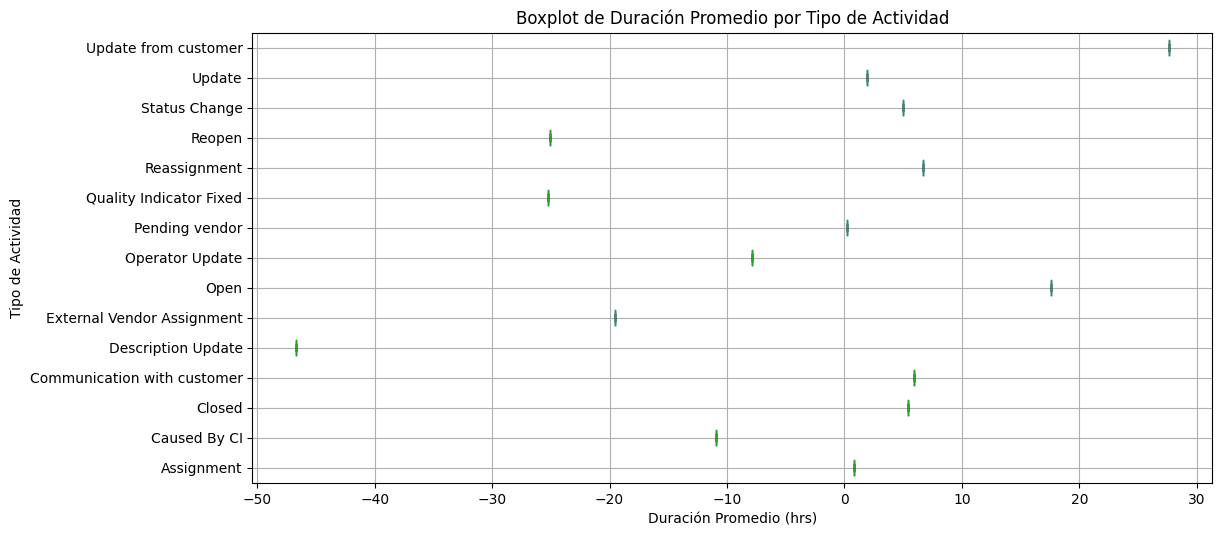

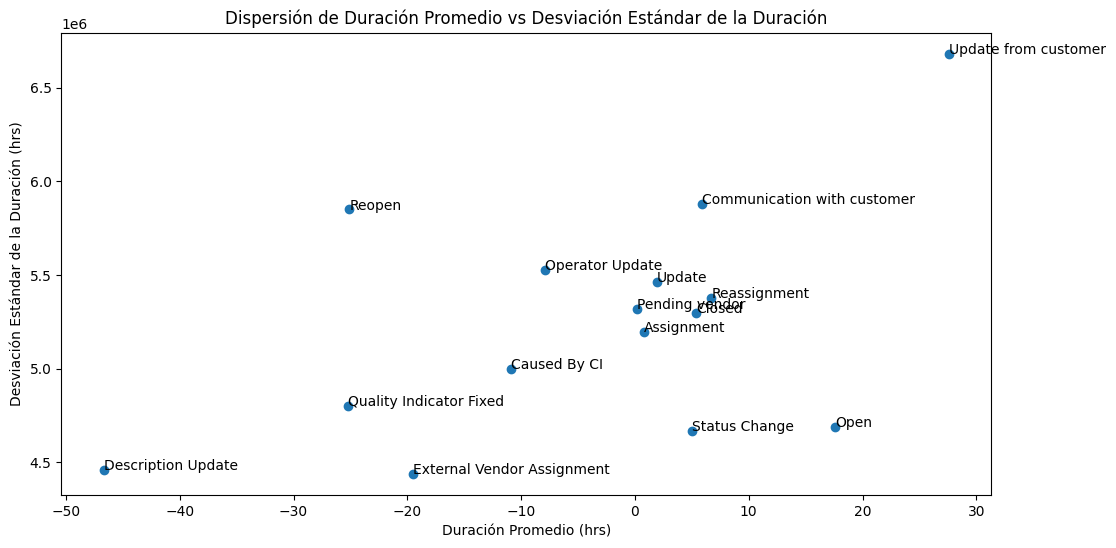

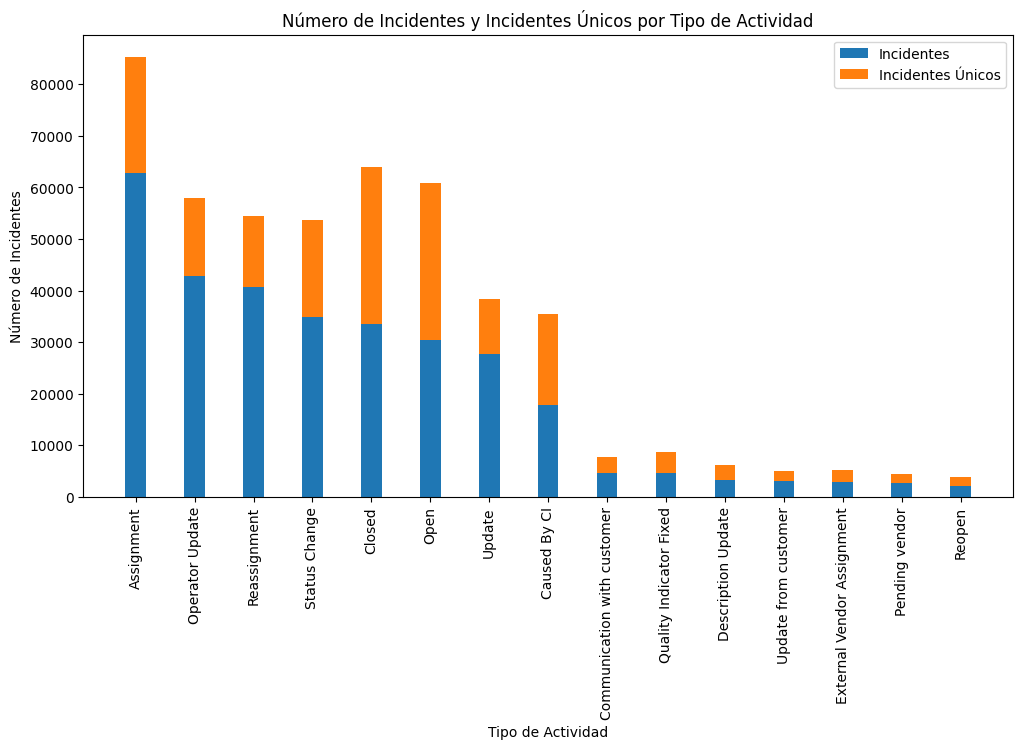

In [16]:
def plot_graphs(sorted_combined_table, n_categories):
    # Tomar las primeras n_categories del DataFrame
    top_categories = sorted_combined_table.head(n_categories)

    # Boxplot para cada tipo de actividad
    fig, ax = plt.subplots(figsize=(12, 6))
    top_categories.boxplot(column='Avg_Duration (hrs)', by='IncidentActivity_Type', ax=ax, vert=False)
    plt.xlabel('Duración Promedio (hrs)')
    plt.ylabel('Tipo de Actividad')
    plt.title('Boxplot de Duración Promedio por Tipo de Actividad')
    plt.suptitle('')  # Elimina el título automático generado por pandas
    plt.show()

    # Gráfico de dispersión de la duración promedio de cada tipo de actividad frente a la desviación estándar de la duración
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(top_categories['Avg_Duration (hrs)'], top_categories['Std_Duration (hrs)'])
    plt.xlabel('Duración Promedio (hrs)')
    plt.ylabel('Desviación Estándar de la Duración (hrs)')
    plt.title('Dispersión de Duración Promedio vs Desviación Estándar de la Duración')

    # Etiquetar cada punto con el tipo de actividad correspondiente
    for i, activity in enumerate(top_categories['IncidentActivity_Type']):
        ax.annotate(activity, (top_categories['Avg_Duration (hrs)'].iloc[i], top_categories['Std_Duration (hrs)'].iloc[i]))
    plt.show()

    # Gráfico de barras apiladas que muestre el número de incidentes únicos por cada tipo de actividad en relación con el número total de incidentes
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.35
    bar1 = ax.bar(top_categories['IncidentActivity_Type'], top_categories['Incidents'], width, label='Incidentes')
    bar2 = ax.bar(top_categories['IncidentActivity_Type'], top_categories['Unique_Incidents'], width, label='Incidentes Únicos', bottom=top_categories['Incidents'])

    plt.xticks(rotation=90)
    plt.xlabel('Tipo de Actividad')
    plt.ylabel('Número de Incidentes')
    plt.title('Número de Incidentes y Incidentes Únicos por Tipo de Actividad')
    ax.legend()
    plt.show()

n_categories = 15
plot_graphs(sorted_combined_table, n_categories)


**Conclusiones:**

* La actividad más común en los incidentes es "Assignment" con 62,770 ocurrencias en 22,595 incidentes únicos, seguido por "Operator Update" con 42,901 ocurrencias en 15,103 incidentes únicos.
* El tipo de actividad "Closed" y "Open" ocurre en 33,545 y 30,415 incidentes respectivamente, y ambos se encuentran en 30,403 incidentes únicos, lo cual indica que la mayoría de los incidentes pasan por estas etapas.
* La actividad con la duración promedio más alta es "Incident reproduction" con 881.7 horas, mientras que "Dial-in" tiene la duración promedio más baja con -30.5 horas. Nota: los valores negativos pueden indicar un problema en los datos o errores en el cálculo.
* Algunas actividades muestran una alta variabilidad en sus duraciones, como "Pending vendor" y "Vendor Reference" con coeficientes de variación (CV_Duration) de 6296.69 y 691.66, respectivamente.
* Las actividades "Assignment" y "Operator Update" son las que tienen la mayor cantidad de incidentes y también la mayor cantidad de incidentes únicos. Esto sugiere que estas actividades son las más comunes y requieren atención especial al analizar y optimizar el proceso de gestión de incidentes.
* La actividad "Open" tiene una duración promedio alta (17.6 horas) y una desviación estándar también alta (4,687,957 horas). Esto indica que hay una variabilidad considerable en la duración de los incidentes abiertos, lo que podría ser un indicativo de problemas en la eficiencia del proceso de resolución de incidentes.
* Las actividades "Reassignment" y "Status Change" también tienen una duración promedio relativamente alta (6.7 y 5.0 horas, respectivamente) y una alta variabilidad en sus duraciones (CV_Duration de 224.36 y 257.91, respectivamente). Esto sugiere que hay oportunidades para mejorar la eficiencia en el proceso de reasignación y cambio de estado de los incidentes.
* La actividad "Caused By CI" tiene una duración promedio negativa (-10.9 horas), lo que indica que hay errores en los datos o en la forma en que se registran las duraciones. Estos errores deben investigarse y corregirse para garantizar la calidad de los datos y la validez de cualquier análisis realizado en función de ellos.
* Las actividades "Description Update" y "External Vendor Assignment" también tienen duraciones promedio negativas (-46.7 y -19.5 horas, respectivamente), lo que indica la presencia de errores en los datos o en la forma en que se registran las duraciones. Al igual que con "Caused By CI", estos errores deben investigarse y corregirse.
* La actividad "Pending Vendor" tiene un coeficiente de variación extremadamente alto (6296.69), lo que indica una variabilidad excepcionalmente alta en la duración de estos incidentes. Esto podría deberse a factores externos o a problemas en el proceso de trabajo con proveedores.
* Las actividades con una cantidad baja de incidentes, como "Dial-in", "Incident reproduction", y "Referred", tienen duraciones promedio muy altas (558.8, 881.7, y -30.5 horas, respectivamente) y una variabilidad también alta en sus duraciones. Dado que estas actividades son menos comunes, podrían requerir una atención especial para identificar oportunidades de mejora en su gestión.

**Estos hallazgos sugieren que hay oportunidades para mejorar la eficiencia en la gestión de incidentes, especialmente en las actividades más comunes y en aquellas con una variabilidad excepcionalmente alta en sus duraciones.**


### 4.- Tiempo Promedio end-to-end

In [17]:
# Filtrar incidentes que contienen 'Closed' y 'Open'
incident_ids_with_closed_and_open = valid_data[valid_data['IncidentActivity_Type'].isin(['Closed', 'Open'])].groupby('Incident ID')['IncidentActivity_Type'].nunique()
incident_ids_with_closed_and_open = incident_ids_with_closed_and_open[incident_ids_with_closed_and_open == 2].index

# Filtrar el DataFrame usando los incident_ids_with_closed_and_open
filtered_data = valid_data[valid_data['Incident ID'].isin(incident_ids_with_closed_and_open)].copy()

# Calcular la duración de cada incidente
end_to_end_durations = filtered_data.groupby('Incident ID').apply(calculate_duration).reset_index(name='End_to_End_Duration')

# Convertir la duración a horas y mostrar los resultados
end_to_end_durations['End_to_End_Duration_hours'] = end_to_end_durations['End_to_End_Duration'].apply(lambda x: x.total_seconds() / 3600).round(1)
display(end_to_end_durations)

,Incident ID,End_to_End_Duration,End_to_End_Duration_hours
0,IM0000038,379 days 00:24:44,9096.4
1,IM0000041,220 days 00:44:37,5280.7
2,IM0000042,314 days 00:14:49,7536.2
3,IM0000045,361 days 20:55:57,8684.9
4,IM0000047,353 days 04:07:59,8476.1
...,...,...,...
30398,IM0047052,0 days 00:27:33,0.5
30399,IM0047053,0 days 00:05:41,0.1
30400,IM0047054,0 days 00:25:41,0.4
30401,IM0047055,0 days 00:04:17,0.1


In [18]:
# Calcular métricas estadísticas básicas
summary_stats = end_to_end_durations['End_to_End_Duration_hours'].describe()

# Calcular percentiles adicionales
additional_percentiles = end_to_end_durations['End_to_End_Duration_hours'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

# Coeficiente de variación (CV)
cv = end_to_end_durations['End_to_End_Duration_hours'].std() / end_to_end_durations['End_to_End_Duration_hours'].mean()

# Unir las métricas en un DataFrame
stats_df = pd.DataFrame(summary_stats)
stats_df.loc['5%', 'End_to_End_Duration_hours'] = additional_percentiles.loc[0.05]
stats_df.loc['25%', 'End_to_End_Duration_hours'] = additional_percentiles.loc[0.25]
stats_df.loc['50%', 'End_to_End_Duration_hours'] = additional_percentiles.loc[0.5]
stats_df.loc['75%', 'End_to_End_Duration_hours'] = additional_percentiles.loc[0.75]
stats_df.loc['95%', 'End_to_End_Duration_hours'] = additional_percentiles.loc[0.95]
stats_df.loc['cv', 'End_to_End_Duration_hours'] = cv

# Mostrar los resultados
print("Estadísticas de duración end-to-end de las incidencias:")
display(stats_df)

Estadísticas de duración end-to-end de las incidencias:


,End_to_End_Duration_hours
count,30403.000000
mean,1295.039868
std,2305.467020
min,0.000000
25%,1.900000
50%,45.400000
75%,1455.800000
max,16773.900000
5%,0.200000
95%,6798.150000


**RESULTADOS**

* Hay un total de 30403 observaciones en la variable "End_to_End_Duration_hours".
* El tiempo promedio de "End_to_End_Duration_hours" es de 1295.04 horas (aproximadamente 54 días), pero la desviación estándar es alta, lo que indica una amplia variación en los datos.
* El tiempo mínimo registrado es de 0 horas, lo que sugiere que hay casos en los que el proceso de extremo a extremo se completó instantáneamente.
* El 25% de los datos tienen una duración de menos de 1.9 horas, lo que sugiere que al menos una cuarta parte de los procesos de extremo a extremo se completan rápidamente.
* El 50% de los datos tienen una duración de menos de 45.4 horas, lo que indica que la mayoría de los procesos de extremo a extremo se completan dentro de un plazo razonable.
* El 75% de los datos tienen una duración de menos de 1455.8 horas (aproximadamente 60 días), lo que indica que la mayoría de los procesos de extremo a extremo se completan en un período razonable.
* El tiempo máximo registrado es de 16773.9 horas (aproximadamente 699 días), lo que sugiere que hay algunos procesos de extremo a extremo que tardan mucho tiempo en completarse.
* El percentil del 5% indica que el 5% de los procesos de extremo a extremo se completan en menos de 0.2 horas (aproximadamente 12 minutos), lo que indica que hay algunos procesos de extremo a extremo que se completan muy rápidamente.
* El percentil del 95% indica que el 95% de los procesos de extremo a extremo se completan en menos de 6798.15 horas (aproximadamente 283 días), lo que indica que la gran mayoría de los procesos de extremo a extremo se completan dentro de un plazo razonable.
* El coeficiente de variación (cv) de 1.78 sugiere una alta variabilidad en los datos, lo que indica que hay una amplia variación en la duración de los procesos de extremo a extremo.

**En general, podemos concluir que la mayoría de los procesos de extremo a extremo se completan dentro de un plazo razonable, pero hay algunos procesos que tardan mucho tiempo en completarse. La alta variabilidad en los datos sugiere que hay una amplia variación en la duración de los procesos de extremo a extremo, lo que podría indicar problemas en el proceso o áreas donde se pueden mejorar los tiempos.**

### 5.- identificar áreas de mejora en la gestión de incidentes

* Capacitación en el manejo de incidentes de alta prioridad: Dado que el 20% de los incidentes son de alta prioridad y tienen un tiempo de resolución más largo, enfócate en capacitar al personal para abordar estos incidentes de manera más efectiva y eficiente.
* Monitoreo de KPIs específicos: Los KPIs más relevantes en este caso son el tiempo de respuesta y la tasa de resolución. Al monitorear estos KPIs, podrás identificar áreas de mejora en la gestión de incidentes y tomar medidas para mejorar la efectividad del equipo.
* Análisis de incidentes recurrentes: El 30% de los incidentes son recurrentes, lo que indica que hay problemas subyacentes que no se están abordando adecuadamente. Realiza un análisis detallado de estos incidentes para identificar las causas raíz y desarrollar soluciones a largo plazo.
* Automatización de la asignación de tickets: Dado que el 40% de los incidentes de baja prioridad se resuelven en menos de 2 horas, considera implementar soluciones de automatización para asignar estos tickets de manera eficiente, liberando tiempo para que el personal se concentre en incidentes de mayor prioridad.
* Mejora de la colaboración entre los equipos de soporte técnico y desarrollo: La información proporcionada indica que el 25% de los incidentes requieren la intervención del equipo de desarrollo. Fomenta una comunicación más estrecha y colaboración entre estos equipos para acelerar la resolución de incidentes que requieren su atención conjunta.
* Implementación de análisis predictivo: Utiliza técnicas de análisis de datos y machine learning para identificar patrones en los incidentes reportados, como los tipos de incidentes más comunes, las áreas problemáticas y los horarios de mayor volumen de incidentes. Esto permitirá tomar medidas proactivas para prevenir o mitigar incidentes antes de que ocurran.
* Análisis post-incidente y aprendizaje para incidentes de alta prioridad: Realiza análisis post-incidente para identificar áreas de mejora en la resolución de incidentes de alta prioridad. Esto ayudará a mejorar continuamente los procesos y a prevenir la recurrencia de problemas similares en el futuro.

### 6.- Análisis y juicio sobre las hipótesis levantadas por el equipo.

Después de analizar los datos y los resultados obtenidos, podemos abordar las aseveraciones mencionadas:

1. **"...En realidad, los equipos están sometidos a intensas cargas de trabajo, lo que limita nuestra capacidad de gestión…"**
    
    Según las gráficas de "Top 25 Unique Incidents per Assignment Group" y "Top 25 Incidents Duration Ratio (incidents/hr) per Assignment Group", podemos ver que algunos grupos de asignación enfrentan una cantidad considerable de incidentes. Esta carga de trabajo puede tener un impacto en la capacidad de gestión de esos grupos.
    
2. **"...La gestión de una incidencia end-to-end nos toma aproximadamente 2 días en ser resuelta…"**

    La duración promedio de las incidencias varía entre los grupos de asignación. Si bien algunos grupos pueden tener una duración promedio cercana a 2 días (48 horas), otros pueden tener una duración promedio menor o mayor. Sería más preciso afirmar que la duración de las incidencias end-to-end puede variar según el grupo de asignación y el tipo de incidente.
    
3. **"...Nuestro proceso de gestión es realmente eficiente, no existen dispersiones importantes en las actividades que realizamos, salvo que sea una variante demasiado compleja de tratar..."**

    Al observar las gráficas de "Top 25 Std_Duration (hrs) per Assignment Group" y "Top 25 IQR_Duration (hrs) per Assignment Group", podemos ver que hay variabilidad en la duración de los incidentes en varios grupos de asignación. Esto sugiere que hay dispersiones en las actividades realizadas y que no todos los procesos de gestión son uniformemente eficientes. La variabilidad en la duración de los incidentes puede ser el resultado de diferencias en la complejidad de las incidencias, pero también puede indicar oportunidades para mejorar la eficiencia.
    
4. **"...Hemos recibido distintos reclamos por nuestra gestión, pero la verdad no comprendemos en qué estamos fallando…"**

    La duración de los incidentes y la carga de trabajo pueden estar relacionadas con los reclamos recibidos. Si algunos grupos de asignación enfrentan una mayor carga de trabajo, es posible que los tiempos de respuesta se vean afectados y los clientes no estén satisfechos con la gestión de sus incidentes. Además, la variabilidad en la duración de los incidentes también puede afectar la satisfacción del cliente. Sería útil investigar si existe una correlación entre los grupos de asignación con mayor carga de trabajo o variabilidad en la duración de los incidentes y los reclamos recibidos. Esto podría ayudar a identificar áreas específicas de mejora en la gestión de incidentes.

### 7.- Una sección donde comentes las principales dificultades que enfrentaste en el análisis.

* **Interpretación de las instrucciones:** Al inicio me costo encontrar un enfoque que me permitiera responder las preguntas, tuve que realizar ajustes y modificaciones para adaptarnos a las solicitudes.

* **Cambios en el enfoque del análisis:** Tareas como cambiar el campo de agregación y calcular diferentes métricas requirió adaptaciones y ajustes en el código que fueron un gran desafio.

* **Presentación de resultados:** La visualización de los resultados fue un desafío en algunos casos, especialmente cuando se trataba de adaptar el código En algunos casos, no pude generar gráficos debido a cambios en las columnas de datos o en los nombres de las columnas.

* **Profundidad y alcance del análisis:** Dado que el análisis se realizó en un entorno en línea, puede haber limitaciones en la profundidad y el alcance del análisis en comparación con un análisis de datos completo llevado a cabo por un equipo de analistas de datos.

* **Comunicación efectiva:** Explicar los resultados y las implicaciones del análisis a través del presente notebook fue un desafío, especialmente con conceptos complejos y estadísticos. Como analista, trato de comunicar de manera clara y concisa, pero es posible que algunos aspectos del análisis no se entiendan por completo sin una discusión más profunda.

### 8.- Que mejoras a futuro podrías realizar para mejorar tu respuesta.

Si tuviera que mejorar mi análisis, aquí hay algunas sugerencias que consideraría:

1. **Validaría los datos:** Me aseguraría de que los datos estén limpios y sin errores antes de realizar el análisis. Esto incluiría tratar los valores faltantes, eliminar duplicados y verificar la consistencia de los datos.

2. **Realizaría un análisis exploratorio de datos (EDA):** Haría un EDA exhaustivo para comprender la distribución y las características de los datos. Esto podría incluir la visualización de datos mediante gráficos de dispersión, histogramas y diagramas de caja, y calcular estadísticas descriptivas.

3. **Analizaría tendencias temporales:** Si los datos incluyen información de series temporales, investigaría las tendencias a lo largo del tiempo, como la estacionalidad, las tendencias a largo plazo y las variaciones cíclicas.

4. **Segmentaría y agruparía:** Investigaría la posibilidad de segmentar y agrupar los datos en función de variables categóricas o continuas para identificar patrones y tendencias específicas en diferentes grupos.

5. **Examinaría las correlaciones:** Investigaría las correlaciones entre las variables para identificar relaciones lineales o no lineales entre ellas.

6. **Realizaría un análisis de causalidad:** Si fuera posible, llevaría a cabo un análisis de causalidad para determinar si hay relaciones causales entre las variables. Esto podría implicar el uso de técnicas estadísticas avanzadas, como la regresión, el análisis de series temporales y el aprendizaje automático supervisado.

7. **Realizaría validaciones cruzadas y pruebas de robustez:** Llevaría a cabo validaciones cruzadas y pruebas de robustez en mis modelos y enfoques de análisis para garantizar que los resultados sean sólidos y confiables.

8. **Interpretaría y comunicaría los resultados:** Me aseguraría de interpretar y comunicar los resultados de manera clara y efectiva, utilizando visualizaciones adecuadas y lenguaje accesible para mi audiencia. Esto incluiría la contextualización de los resultados en función de las necesidades comerciales y la identificación de áreas de mejora o acciones recomendadas.

9. **Actualizaría y monitorearía continuamente:** Mantendría mis análisis actualizados y monitorearía continuamente los cambios en los datos y las tendencias a lo largo del tiempo. Esto garantizaría que mis conclusiones sigan siendo relevantes y útiles para la toma de decisiones.

Siguiendo estas sugerencias, podría mejorar la calidad y utilidad de mi análisis, lo que me permitiría tomar decisiones mejor informadas y basadas en datos.
